In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal

import h5py

In [2]:
%matplotlib notebook

In [3]:
%reload_ext autoreload
%autoreload 2

In [5]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *
from likelihood_calculator import likelihood_analyser

In [6]:
lc_i = likelihood_analyser.LikelihoodAnalyser()

### Load data

In [7]:
foldername = r'/data/new_trap/20191104/Bead1/DMdata/'
bdf_DMdata = load_dir(foldername)
foldername = r'/data/new_trap/20191104/Bead1/DMdata2/'
bdf_DMdata2 = load_dir(foldername)

30  files in folder
30  files loaded
30  files in folder
30  files loaded


In [8]:
foldername = r'/data/new_trap/20191104/Bead1/Discharge4/'
bdf_discharge2 = load_dir(foldername)

103  files in folder
103  files loaded


<IPython.core.display.Javascript object>


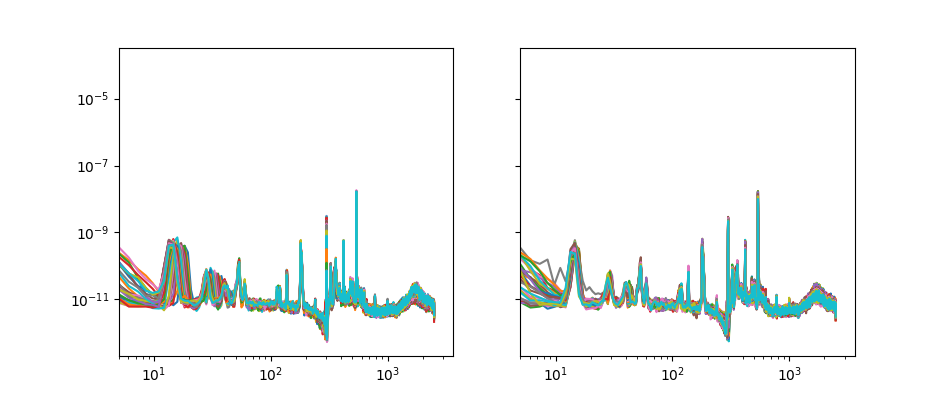

[(5, 3660.214239864062)]

In [10]:
_,ax = plt.subplots(1,2,figsize=(9.5,4), sharex=True, sharey=True)
[ax[0].loglog(*bb.welch_psd('x')) for bb in bdf_DMdata]
ax[0].set(xlim=(5,None))
[ax[1].loglog(*bb.welch_psd('x')) for bb in bdf_DMdata2]
ax[1].set(xlim=(5,None))

In [11]:
freq = bdf_discharge2[3].welch_psd('x')[0]
psds = [bb.welch_psd('x')[1] for bb in bdf_discharge2[3:]]

<IPython.core.display.Javascript object>


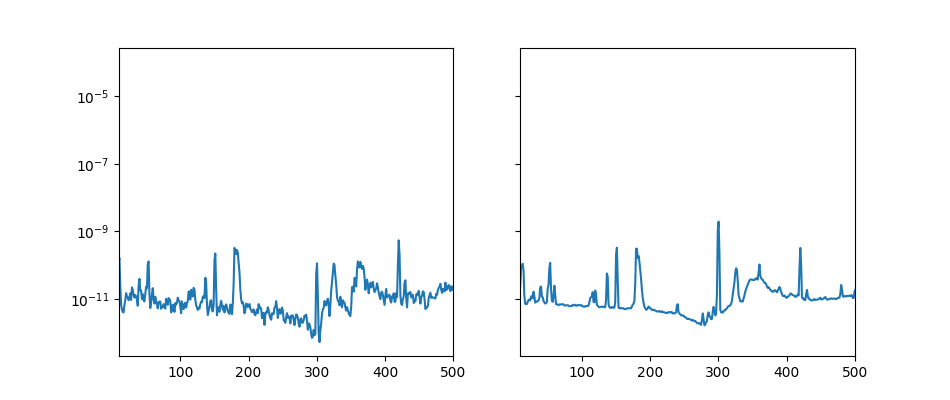

[(10, 500)]

In [12]:
bdf_sum = np.mean(psds, axis=0)
_,ax = plt.subplots(1,2,figsize=(9.5,4), sharex=True, sharey=True)
ax[0].semilogy(*bdf_discharge2[3].welch_psd('x'))
ax[1].semilogy(freq,bdf_sum)
ax[0].set(xlim=(10,500))

In [69]:
bb = bdf_discharge2[20]
filename = r'/home/data_transfer/data_from_windows/20191107/Bead1/DMdata/Discharge_120.h5'
# filename = r'/home/data_transfer/data_from_windows/20191107/Bead1/DMdata2/Discharge_115.h5'
bb = BeadDataFile.BeadDataFile(filename)
xx = bb.response_at_freq2('x',151, bandwidth=10)*50000
analytic_signal = signal.hilbert(xx)
amplitude_envelope = np.abs(analytic_signal)

xx3 = bb.response_at_freq3('x',151, bandwidth=10)/6
analytic_signal3 = signal.hilbert(xx3)
amplitude_envelope3 = np.abs(analytic_signal3)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


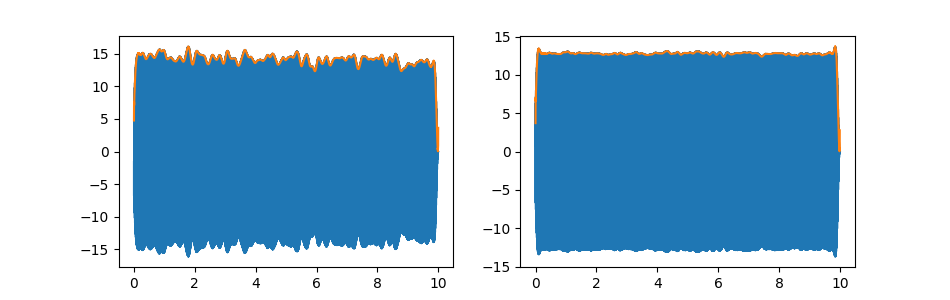

In [70]:
_,ax = plt.subplots(1,2,figsize=(9.5,3))
t = np.arange(50000)/5000
ax[0].plot(t, xx, label='signal')
ax[0].plot(t, amplitude_envelope, label='envelope')

ax[1].plot(t, xx3, label='signal')
ax[1].plot(t, amplitude_envelope3, label='envelope')

In [71]:
t_sub = t[5000:-5000]
average = np.mean(amplitude_envelope3[5000:-5000])
std = np.std(amplitude_envelope3[5000:-5000])
envelope3_subtracted = amplitude_envelope3-average
envelope3_subtracted = envelope3_subtracted[5000:-5000]

In [72]:
np.mean(t_sub.reshape(-1,100),axis=1)
np.mean(np.std(envelope3_subtracted.reshape(-1,100),axis=1))

0.009390926846494688

<IPython.core.display.Javascript object>


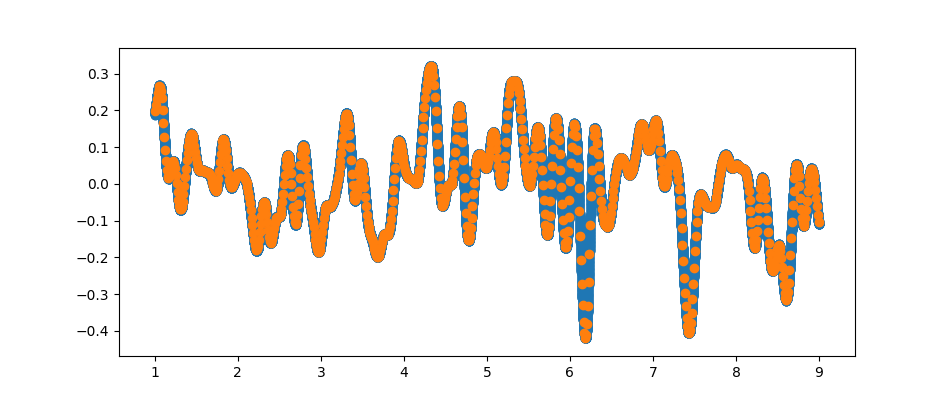

average:  12.781173429716716
std:  0.12749973747107865


In [79]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.scatter(t_sub, envelope3_subtracted)
print('average: ', average)
print('std: ', std)
t_sub_avg = np.mean(t_sub.reshape(-1,50),axis=1)
envelope3_avg = np.mean(envelope3_subtracted.reshape(-1,50),axis=1)
ax.scatter(t_sub_avg, envelope3_avg)

Data overall time:  8.0  sec.
bandpass time:  1.1920928955078125e-06
minimization time:  0.006602287292480469
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |  -0.039   |   0.006   |            |            |   -1    |    1    |       |
| 1 | f    |   0.25    |   1.00    |            |            |         |         |  yes  |
| 2 | phi  |   4.34    |   0.17    |            |            |    0    | 6.28319 |       |
------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


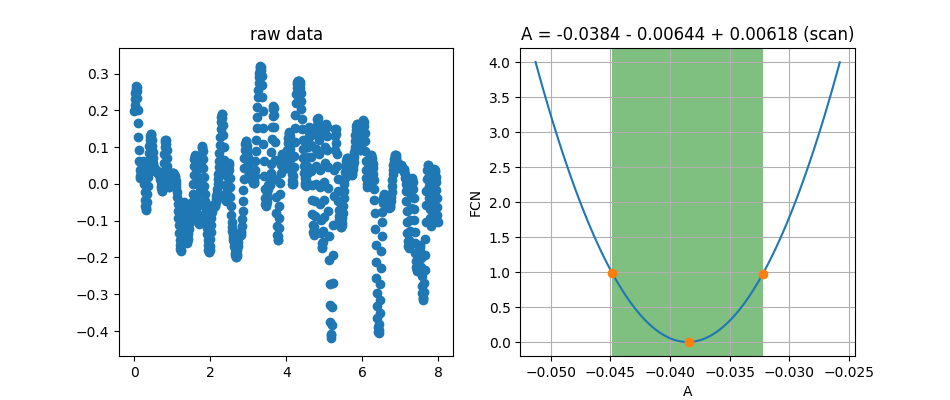

reduced chi2:  0.9544837639712683


In [80]:
freq = 0.25
fit_kwargs = {'A': 0, 'f': freq, 'phi': np.pi,
              'error_A': 0.01, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
              'limit_phi': [0, 2 * np.pi], 'limit_A': [-1,1],
              'print_level': 0, 'fix_f': True, 'fix_phi': False}

empirical_rms = std
m1 = lc_i.find_mle_sin(envelope3_avg, fsamp=100, noise_rms=empirical_rms, plot=True, suppress_print=False, **fit_kwargs)
# m1.minos()

In [82]:
delta_alpha = m1.values[0]/average
print('sensitivity: ', '{:.2e}'.format(np.abs(delta_alpha)))

sensitivity:  3.01e-03
